This Notebook is my playing around with gates to make arbitrary state vectors. QISKit intializes each quantum circuit so that every qbit has the state |0>. This will be a reference later on for simulating different phenomena.

In [1]:
# Standard Library
from math import pi

# 3rd party mpdules
from qiskit import Aer, execute, QuantumRegister, QuantumCircuit 
from qiskit.visualization import plot_histogram

# My functions
from myqiskit.visualize import statevector, statevector_pretty, matrix_pretty

# 1 Qbit Wavefunctions
Manipulation of a single qbit. The one qubit gates are 

In [2]:
# Create the state: |0> + |1> (normalized)
qr = QuantumRegister(1)
circuit = QuantumCircuit(qr)
circuit.h(qr[0])
statevector_pretty(circuit)

\begin{pmatrix}0.71\\0.71\end{pmatrix}

In [3]:
# Create the state: |1>
qr = QuantumRegister(1)
circuit = QuantumCircuit(qr)
circuit.x(qr[0])
statevector_pretty(circuit)

\begin{pmatrix}0\\1\end{pmatrix}

In [4]:
# Create the state: |0> - |1> (normalized)
qr = QuantumRegister(1)
circuit = QuantumCircuit(qr)
circuit.x(qr[0])  # Flip the qubit
circuit.h(qr[0])  # Superposition state using Hadamard
statevector_pretty(circuit)

\begin{pmatrix}0.71 - 0.00j\\-0.71 + 0j\end{pmatrix}

# 2 Qbit Wavefunctions

In [16]:
# All states have equal probability
qr = QuantumRegister(2)
circuit = QuantumCircuit(qr)
circuit.h(qr[0])
circuit.h(qr[1])
sv = statevector(circuit)
print(sv)
statevector_pretty(circuit)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


\begin{pmatrix}0.50\\0\\0\\0\end{pmatrix}

In [7]:
# The wavefunction is definitely in the state |01>
# Note: in QISkit notation, |01> means the 0 qbit is in state |1> and the 1 qbit is in state |0>
qr = QuantumRegister(2)
circuit = QuantumCircuit(qr)
circuit.x(qr[0])  # Flip the first qbit
statevector_pretty(circuit)

\begin{pmatrix}0\\1\\0\\0\end{pmatrix}

\begin{pmatrix}0.71\\0\\0\\0.71\end{pmatrix}

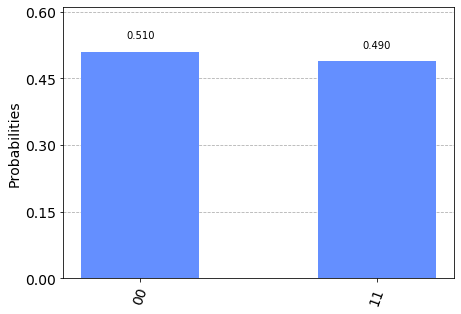

In [8]:
# The wafefunction is in the maximally entangled state |00> + |11> (normalized)
qr = QuantumRegister(2)
circuit = QuantumCircuit(qr)
circuit.h(0)       # Put qbit0 into superposition state
circuit.cx(0,1)    # Control-Not with target= qbit1,  control= qbit0
statevector_pretty(circuit)

circuit.measure_all()
counts = execute(circuit,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

\begin{pmatrix}0\\0.71\\0.71\\0\end{pmatrix}

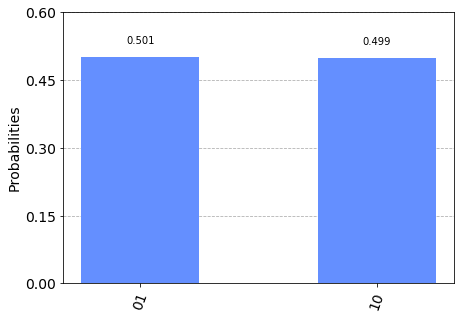

In [9]:
# The wavefunction is in the state |10> + |01> (normalized)
qr = QuantumRegister(2)
circuit = QuantumCircuit(qr)
circuit.h(0)       # Put qbit0 into superposition state
circuit.cx(0,1)    # Control-Not with target = qbit1 control = qbit0
circuit.x(1)       # Flip qbit1
statevector_pretty(circuit)

circuit.measure_all()
counts = execute(circuit,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

# 3 Qbit Wavefunctions

Note on order:
In |abc>
 - a denotes QBit2
 - b denotes QBit1
 - c denotes QBit0

The statevector order is:
(|000> , |001> , |010> , |011> , |100> , |101> , |110> , |111>)

In [10]:
# Build (normalized) Wavefunction:
#    |000> + |001> + |010> + |011> + |100> + |101> + |110> + |111>
qr = QuantumRegister(3)
circuit = QuantumCircuit(qr)

circuit.h(0)  # Hadamard on QBit0 (send to superposition state)
circuit.h(1)
circuit.h(2)

statevector_pretty(circuit)

\begin{pmatrix}0\\0\\0\\0\\0\\0\\0\\0\end{pmatrix}

In [11]:
# Build (normalized) Wavefunction:
#    |000> + |001> + |010> + |011> - |100> - |101> - |110> - |111>
# Note the ordering of the state vector 
qr = QuantumRegister(3)
circuit = QuantumCircuit(qr)

circuit.x(0)  # Flip QBit0
circuit.h(0)  # Hadamard on QBit0
circuit.x(1)  # ...
circuit.h(1)
circuit.x(2)
circuit.h(2)

statevector_pretty(circuit)

\begin{pmatrix}0\\0\\0\\0\\0\\0\\0\\0\end{pmatrix}

In [12]:
# Build Wavefunction:
#    |000> + |001> + |010> + |011>
qr = QuantumRegister(3)
circuit = QuantumCircuit(qr)

circuit.h(0)
circuit.h(1)

statevector_pretty(circuit)

\begin{pmatrix}0.50\\0\\0\\0\\0\\0\\0\\0\end{pmatrix}

## Entangled States

In [13]:
# Build Wavefunction:
#    |000> + |111>
qr = QuantumRegister(3)
circuit = QuantumCircuit(qr)

circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)

statevector_pretty(circuit)

\begin{pmatrix}0.71\\0\\0\\0\\0\\0\\0\\0.71\end{pmatrix}